In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movies = pd.read_csv("/content/movie.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
movies.isnull().sum()

,0
color,19
director_name,102
num_critic_for_reviews,49
duration,15
director_facebook_likes,102
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,862
genres,0


In [6]:
#Cleaning
movies['color'] = movies['color'].fillna('Color')
movies['director_name']= movies['director_name'].fillna('Unknown')
movies['actor_1_name'] = movies['actor_1_name'].fillna('Unknown')
movies['actor_2_name'] = movies['actor_2_name'].fillna('Unknown')
movies['actor_3_name'] = movies['actor_3_name'].fillna('Unknown')
movies['plot_keywords']= movies['plot_keywords'].fillna('Others')

# Filling The Null Values In Numeric Columns With Median
def FillWithMedian(file):
    for column in file.columns:
        if file[column].dtype in ['float64', 'int64']:
            median_value = file[column].median()
            file[column] = file[column].fillna(median_value)
    return file

movies = FillWithMedian(movies)

#Using The Most Common Word "Mode" in Empty Cells
movies['language'] = movies['language'].fillna('English')
movies['content_rating'] = movies['content_rating'].fillna('R')
movies['country'] = movies['country'].fillna('USA')
movies.isnull().sum()

movies.to_csv('NewMovies1.csv', index=False)
movies.isna().sum()


,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


In [31]:
# Visualization
sns.set_theme(style="darkgrid")
NewMovies=pd.read_csv("/content/NewMovies1.csv")

for i in range(len(NewMovies['duration'])):
  NewMovies['duration'][i] = NewMovies['duration'][i]/60
  NewMovies['duration'][i] = round(NewMovies['duration'][i],2)

for i in range(len(movies['gross'])):
  NewMovies['gross'][i] = NewMovies['gross'][i]/1000000
  NewMovies['gross'][i] = round(NewMovies['gross'][i],2)

for i in range(len(movies['budget'])):
  NewMovies['budget'][i] = NewMovies['budget'][i]/1000000
  NewMovies['budget'][i] = round(NewMovies['budget'][i],2)



Streaming output truncated to the last 5000 lines.
<ipython-input-31-6a59af1d09db>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMovies['budget'][i] = NewMovies['budget'][i]/1000000
<ipython-input-31-6a59af1d09db>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMovies['budget'][i] = round(NewMovies['budget'][i],2)
<ipython-input-31-6a59af1d09db>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMovies['budget'][i] = NewM

In [32]:
NewMovies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,2.97,0.0,855.0,Joel David Moore,1000.0,760.51,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237.00,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,2.82,563.0,1000.0,Orlando Bloom,40000.0,309.40,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300.00,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,2.47,0.0,161.0,Rory Kinnear,11000.0,200.07,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245.00,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,2.73,22000.0,23000.0,Christian Bale,27000.0,448.13,Action|Thriller,...,2701.0,English,USA,PG-13,250.00,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,108.0,1.72,131.0,366.0,Rob Walker,131.0,25.04,Documentary,...,153.0,English,USA,R,19.85,2005.0,12.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,1.45,2.0,318.0,Daphne Zuniga,637.0,25.04,Comedy|Drama,...,6.0,English,Canada,R,19.85,2013.0,470.0,7.7,2.35,84
4912,Color,Unknown,43.0,0.72,48.0,319.0,Valorie Curry,841.0,25.04,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,19.85,2005.0,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,1.27,0.0,0.0,Maxwell Moody,0.0,25.04,Drama|Horror|Thriller,...,3.0,English,USA,R,0.00,2013.0,0.0,6.3,2.35,16
4914,Color,Daniel Hsia,14.0,1.67,0.0,489.0,Daniel Henney,946.0,0.01,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,19.85,2012.0,719.0,6.3,2.35,660


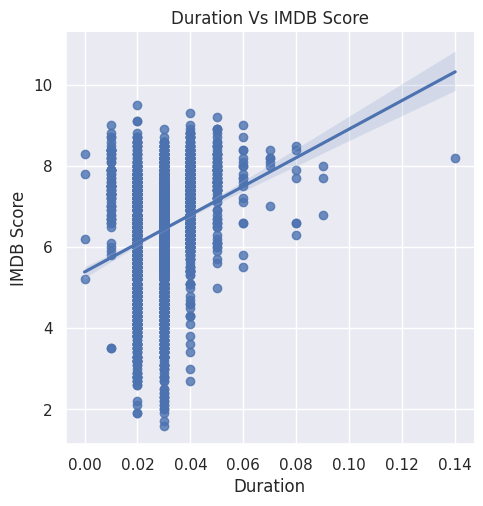

In [37]:
sns.lmplot(x="duration", y="imdb_score", data=movies)
plt.title("Duration Vs IMDB Score")
plt.xlabel("Duration")
plt.ylabel("IMDB Score")
plt.show()

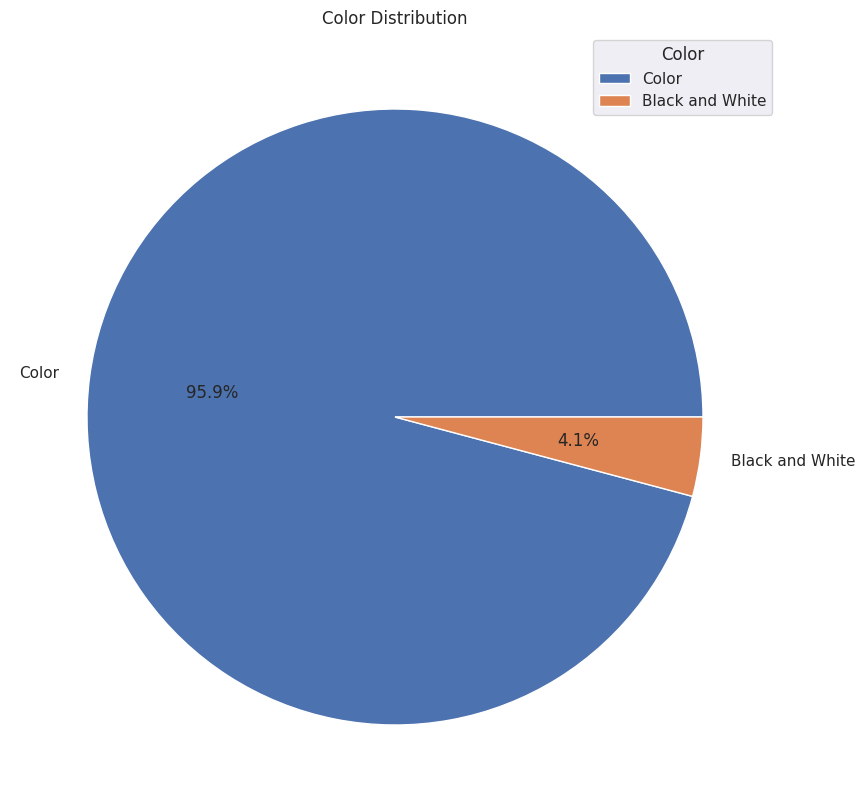

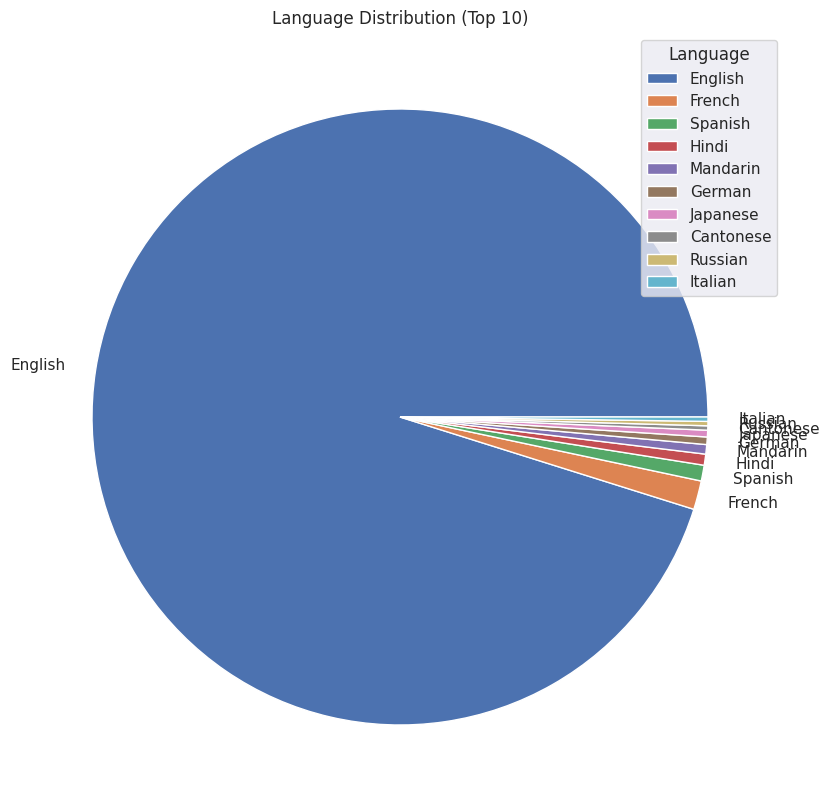

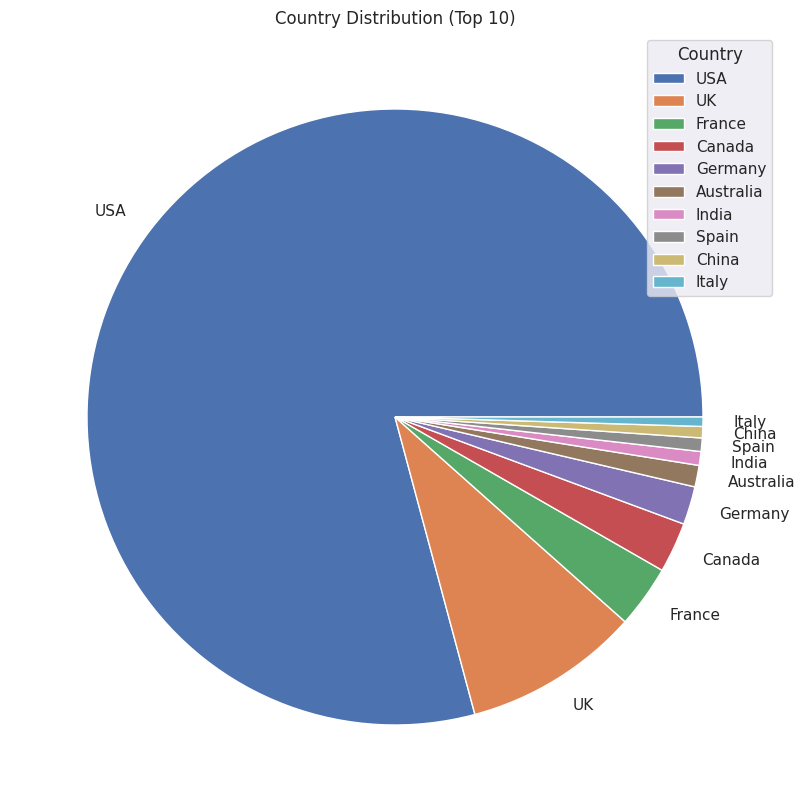

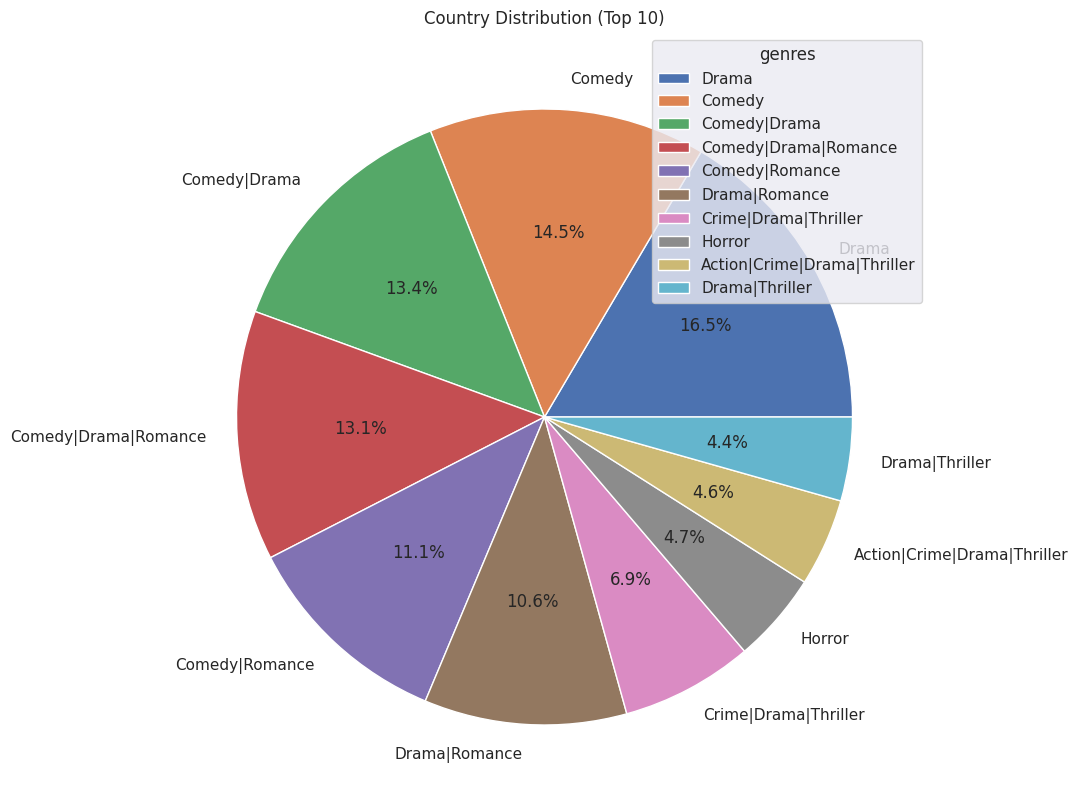

In [56]:

# Pie chart for color
plt.figure(figsize=(10, 10))
plt.pie(movies['color'].value_counts(), labels=movies['color'].value_counts().index, autopct='%1.1f%%')
plt.title('Color Distribution')
plt.legend(title="Color", loc="best")
plt.show()

# Pie chart for language
plt.figure(figsize=(10, 10))
plt.pie(movies['language'].value_counts()[:10], labels=movies['language'].value_counts()[:10].index)
plt.title('Language Distribution (Top 10)')
plt.legend(title="Language", loc="best")
plt.show()

# Pie chart for country
plt.figure(figsize=(10, 10))
plt.pie(movies['country'].value_counts()[:10], labels=movies['country'].value_counts()[:10].index)
plt.title('Country Distribution (Top 10)')
plt.legend(title="Country", loc="best")
plt.show()

# Pie chart for genres
plt.figure(figsize=(10, 10))
plt.pie(movies['genres'].value_counts()[:10], labels=movies['genres'].value_counts()[:10].index, autopct='%1.1f%%')
plt.title('Genres Distribution (Top 10)')
plt.legend(title="genres", loc="best")
plt.show()


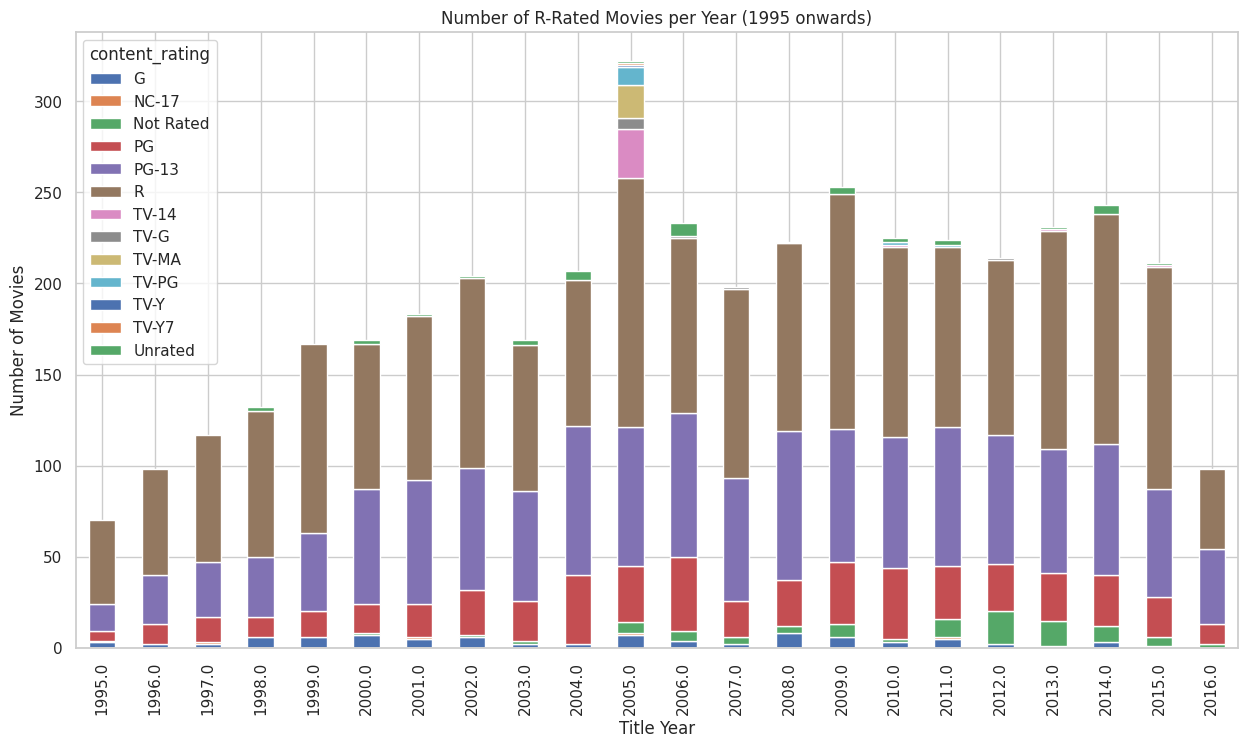

In [86]:

# Filter the data for movies released from 1995 onwards
movies_filtered = NewMovies[NewMovies['title_year'] >= 1995]

# Group the data by title year and content rating, then count the number of movies
movies_grouped = movies_filtered.groupby(['title_year', 'content_rating'])['movie_title'].count().unstack()

# Create the stacked bar plot
movies_grouped.plot(kind='bar', stacked=True, figsize=(15, 8))

# Set the title and labels
plt.title('Number of R-Rated Movies per Year (1995 onwards)')
plt.xlabel('Title Year')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()


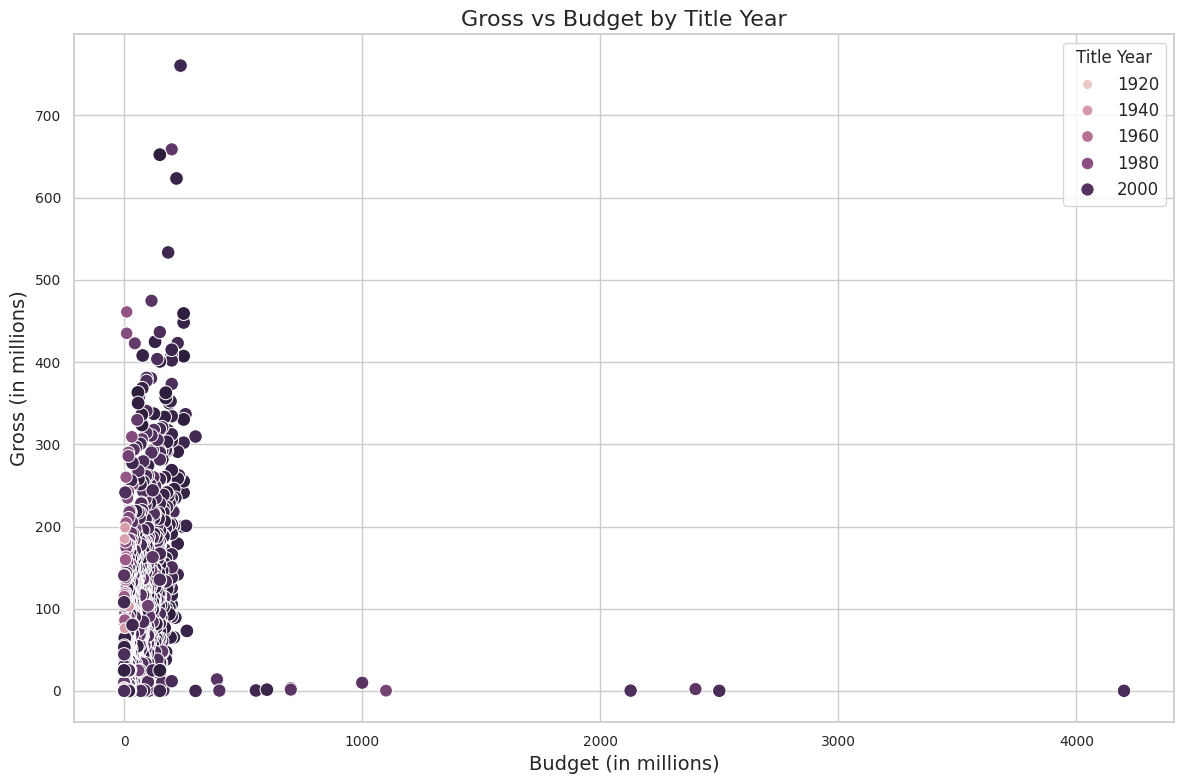

In [87]:



plt.figure(figsize=(12, 8))
sns.scatterplot(x="budget", y="gross", hue="title_year", data=NewMovies, size="title_year", sizes=(50, 100))

# Set the title and labels
plt.title("Gross vs Budget by Title Year", fontsize=16)
plt.xlabel("Budget (in millions)", fontsize=14)
plt.ylabel("Gross (in millions)", fontsize=14)

plt.legend(title="Title Year", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
